<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import scipy as sp
import polars as pl
import seaborn as sns
%matplotlib inline

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [145]:
asset_price = pd.read_csv("../data/asset_price_data.csv")
asset_info = pd.read_csv("../data/asset_information_data.csv")
port_weight = pd.read_csv("../data/portfolio_weights.csv")

df_asset_price = asset_price.copy()
df_asset_info = asset_info.copy()
df_port_weight = port_weight.copy()

### Data Exploration

In [146]:
df_asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


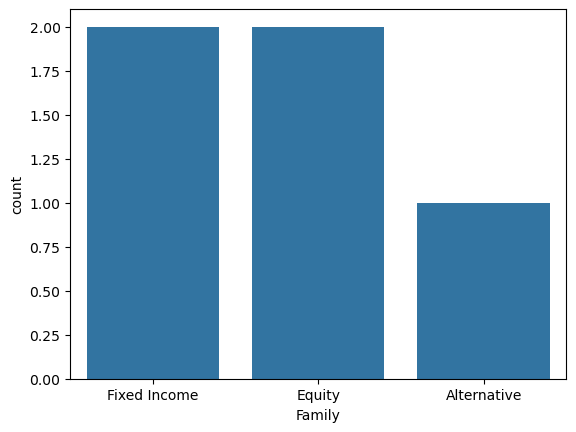

In [147]:
sns.countplot(x=df_asset_info["Family"])
plt.show()

- Two Fixed Income investment (Asset 1, Asset 2)
- Two equitiies (Asset 3, Asset 4)
- One Alternative (Asset 5)

In [148]:
df_asset_price.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41


In [149]:
df_asset_price.isnull().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

- We have null values in the dataset. We have to fill it up properly. 

In [150]:
df_asset_price.shape

(783, 6)

In [151]:
df_port_weight.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [152]:
df_port_weight.isnull().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [153]:
df_port_weight.shape

(783, 6)

In [154]:
df_asset_price.shape == df_port_weight.shape

True

### Data Visualization

In [155]:
df_asset_price["date"] = pd.to_datetime(df_asset_price["date"])
df_port_weight["date"] = pd.to_datetime(df_port_weight["date"])

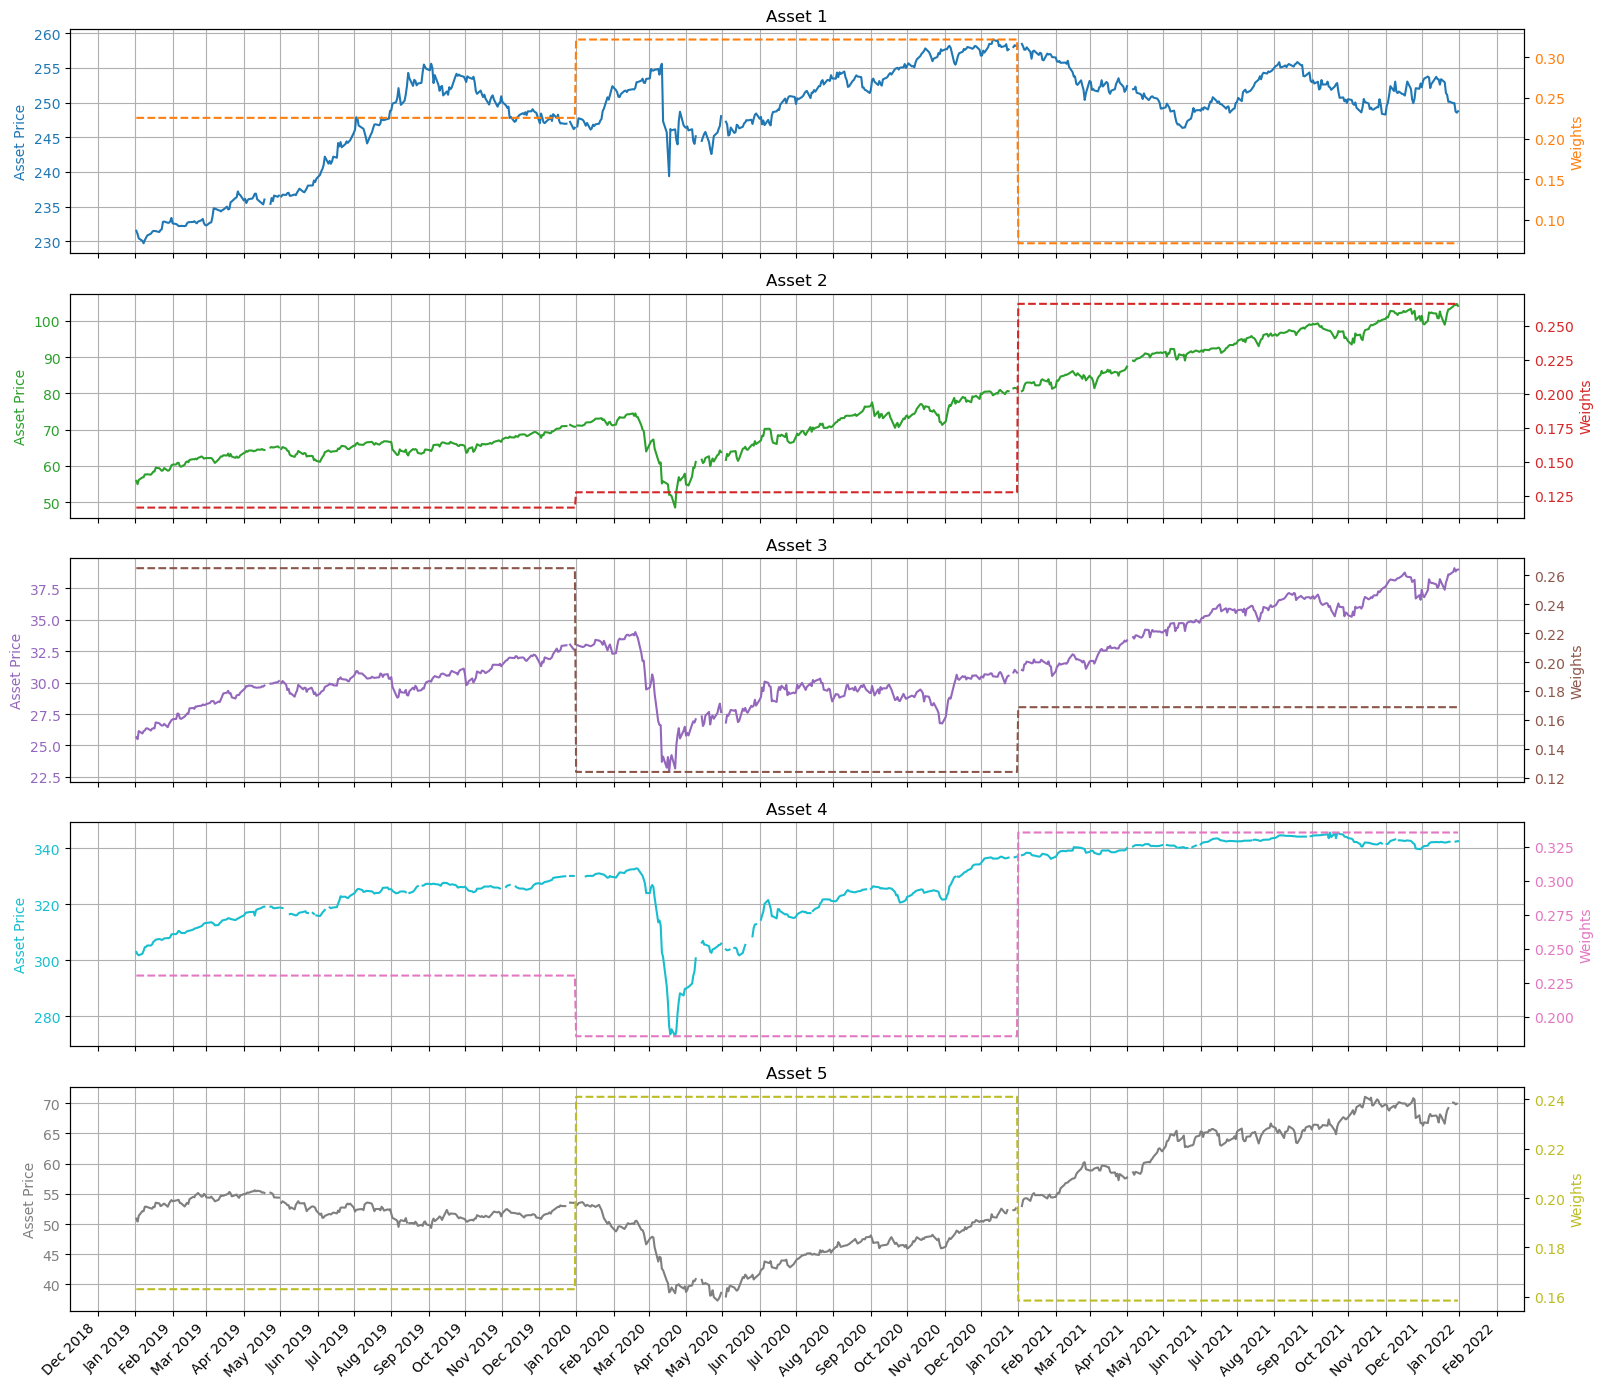

In [156]:
dates = df_asset_price["date"]
n = len(dates)

titles = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5']
color_pairs = [
    ("#1f77b4", "#ff7f0e"),
    ("#2ca02c", "#d62728"),
    ("#9467bd", "#8c564b"),
    ("#17becf", "#e377c2"),
    ("#7f7f7f", "#bcbd22")
]
colors_primary = ['blue', 'orange', 'green', 'red', 'black']
colors_secondary = ['purple', 'brown', 'grey', 'pink', 'dimgrey']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

# Loop through each subplot and add twin y-axis
for i in range(5):
    ax1 = axs[i]  # Primary axis
    ax2 = ax1.twinx()  # Secondary y-axis

    # Plot primary time series
    ax1.plot(dates, df_asset_price.iloc[:, i+1], color=color_pairs[i][0])
    ax1.set_ylabel('Asset Price', color=color_pairs[i][0])
    ax1.tick_params(axis='y', labelcolor=color_pairs[i][0])
    ax1.set_title(titles[i])

    # Plot secondary time series
    ax2.plot(dates, df_port_weight.iloc[:, i+1], color=color_pairs[i][1], linestyle='--')
    ax2.set_ylabel('Weights', color=color_pairs[i][1])
    ax2.tick_params(axis='y', labelcolor=color_pairs[i][1])

    # Grid for clarity
    ax1.grid(True)

# Formatting x-axis as monthly
months = mdates.MonthLocator()  # Monthly locator
months_fmt = mdates.DateFormatter('%b %Y')  # Month-Year format

axs[-1].xaxis.set_major_locator(months)
axs[-1].xaxis.set_major_formatter(months_fmt)

# Rotate x-axis labels for readability
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Common X-axis label
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [157]:
df_asset_price.shape

(783, 6)

In [158]:
df_asset_price.tail(20)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
763,2021-12-06,253.7646,99.968,37.350,341.01,66.71
764,2021-12-07,253.6261,102.305,38.230,341.77,67.81
765,2021-12-08,252.1023,102.094,37.995,342.10,68.21
766,2021-12-09,252.6981,102.279,37.935,342.24,67.84
767,2021-12-10,252.9440,102.097,37.930,342.23,67.90
768,2021-12-13,253.7250,101.977,37.830,342.30,67.95
769,2021-12-14,253.3945,100.740,37.540,342.27,67.58
770,2021-12-15,253.3643,100.650,37.690,342.22,66.80
771,2021-12-16,252.5984,102.564,38.240,342.30,68.15
772,2021-12-17,253.3807,101.310,38.010,342.35,67.88


In [159]:
df_asset_price = df_asset_price.ffill()

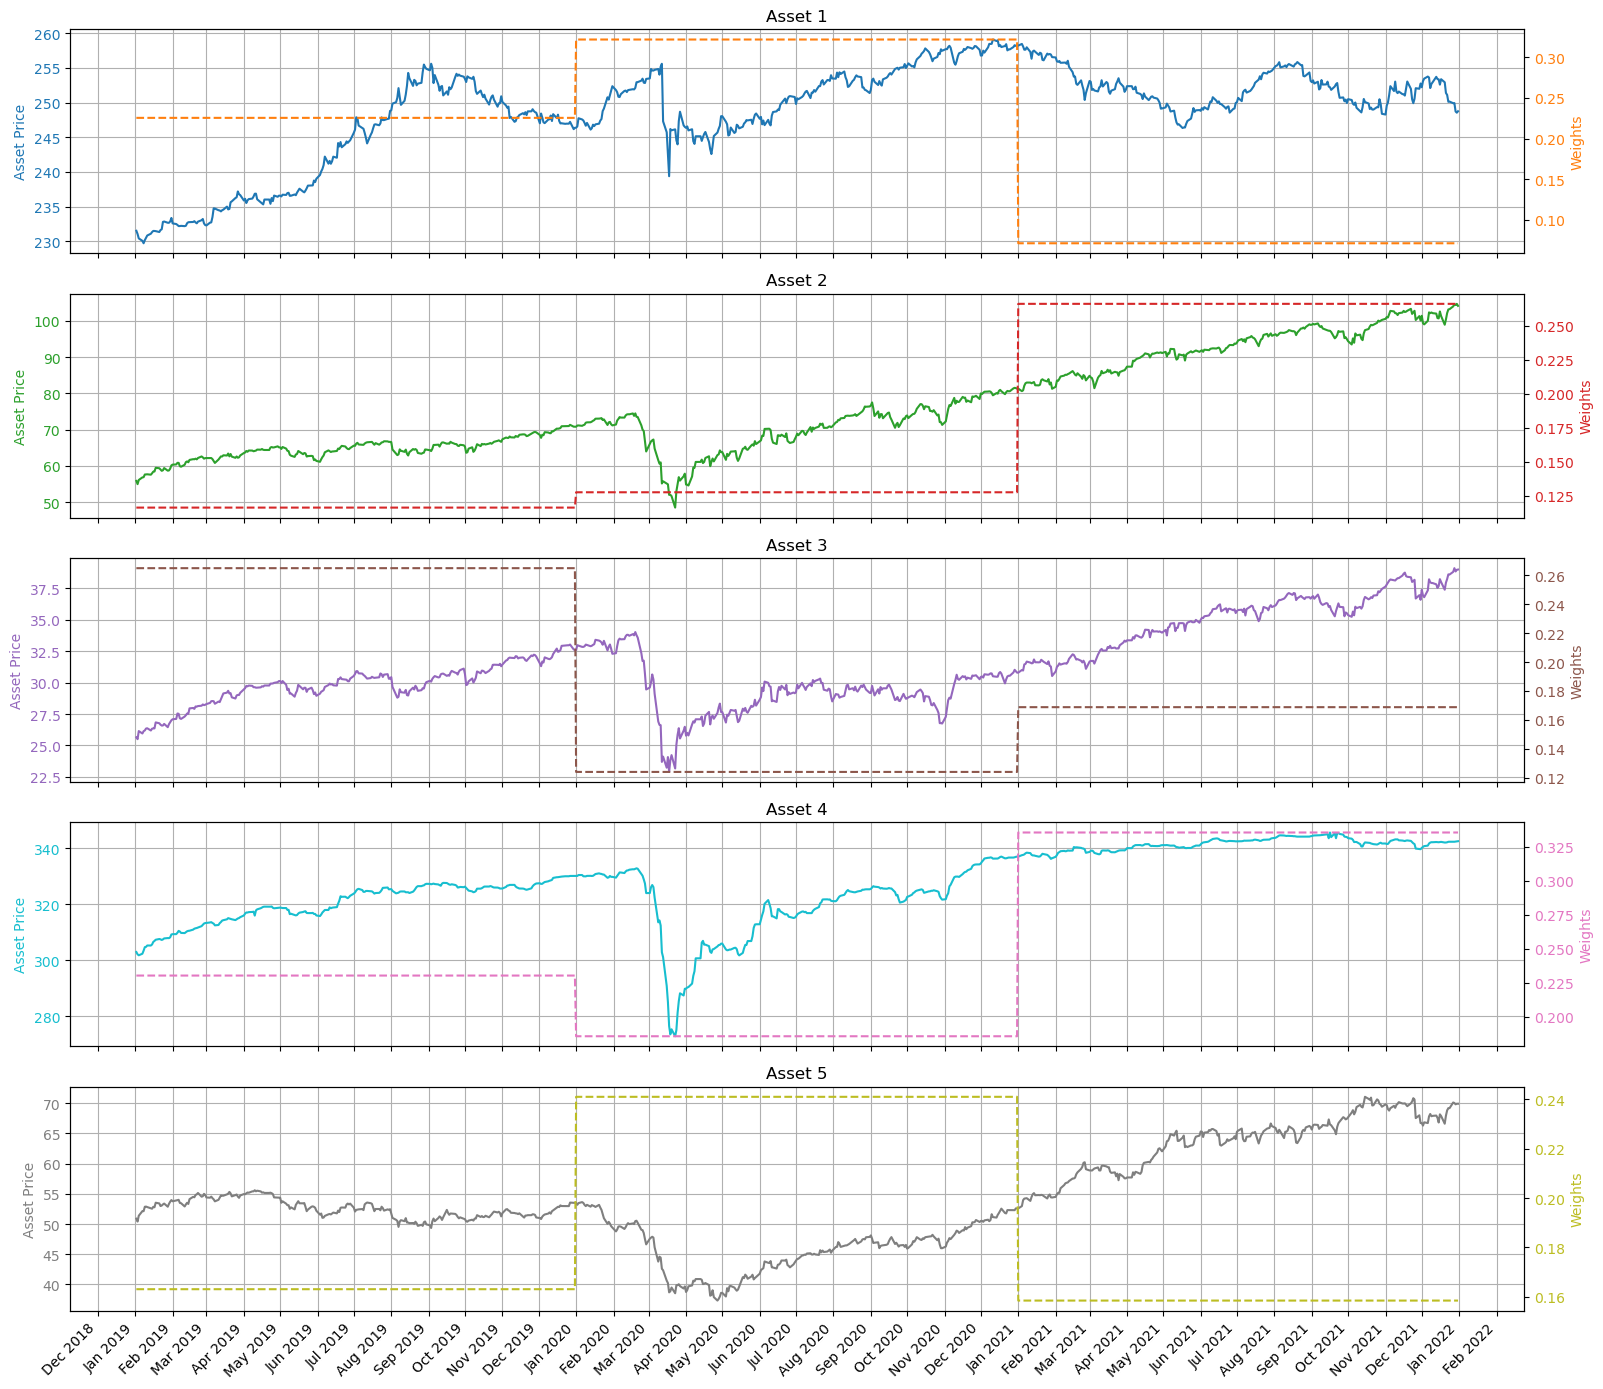

In [160]:
dates = df_asset_price["date"]
n = len(dates)

titles = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5']
color_pairs = [
    ("#1f77b4", "#ff7f0e"),
    ("#2ca02c", "#d62728"),
    ("#9467bd", "#8c564b"),
    ("#17becf", "#e377c2"),
    ("#7f7f7f", "#bcbd22")
]
colors_primary = ['blue', 'orange', 'green', 'red', 'black']
colors_secondary = ['purple', 'brown', 'grey', 'pink', 'dimgrey']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

# Loop through each subplot and add twin y-axis
for i in range(5):
    ax1 = axs[i]  # Primary axis
    ax2 = ax1.twinx()  # Secondary y-axis

    # Plot primary time series
    ax1.plot(dates, df_asset_price.iloc[:, i+1], color=color_pairs[i][0])
    ax1.set_ylabel('Asset Price', color=color_pairs[i][0])
    ax1.tick_params(axis='y', labelcolor=color_pairs[i][0])
    ax1.set_title(titles[i])

    # Plot secondary time series
    ax2.plot(dates, df_port_weight.iloc[:, i+1], color=color_pairs[i][1], linestyle='--')
    ax2.set_ylabel('Weights', color=color_pairs[i][1])
    ax2.tick_params(axis='y', labelcolor=color_pairs[i][1])

    # Grid for clarity
    ax1.grid(True)

# Formatting x-axis as monthly
months = mdates.MonthLocator()  # Monthly locator
months_fmt = mdates.DateFormatter('%b %Y')  # Month-Year format

axs[-1].xaxis.set_major_locator(months)
axs[-1].xaxis.set_major_formatter(months_fmt)

# Rotate x-axis labels for readability
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Common X-axis label
plt.xlabel('Date')
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [161]:
for i in df_asset_price.columns[1:]:
    tmp = i + "_dpr" # dpr: daily percentage returns
    df_asset_price[tmp] = df_asset_price[i].pct_change()

In [162]:
df_asset_price

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Asset1_dpr,Asset2_dpr,Asset3_dpr,Asset4_dpr,Asset5_dpr
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.40,70.11,-0.000913,0.007384,0.005439,0.000000,0.013443
779,2021-12-28,249.9368,104.526,39.115000,342.40,70.03,0.000064,0.005483,0.007599,0.000000,-0.001141
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91,-0.000696,0.002903,0.003346,0.000263,0.001432


In [163]:
returns = df_asset_price.iloc[1:, 6:]

In [164]:
returns.reset_index(drop=True, inplace=True)

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [165]:
cor_mat = df_asset_price[["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"]].corr()

In [166]:
cor_mat

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,0.506719,0.369571,0.563785,0.071127
Asset2,0.506719,1.000000,0.906099,0.877494,0.830147
Asset3,0.369571,0.906099,1.000000,0.877432,0.869988
Asset4,0.563785,0.877494,0.877432,1.000000,0.783916
Asset5,0.071127,0.830147,0.869988,0.783916,1.000000


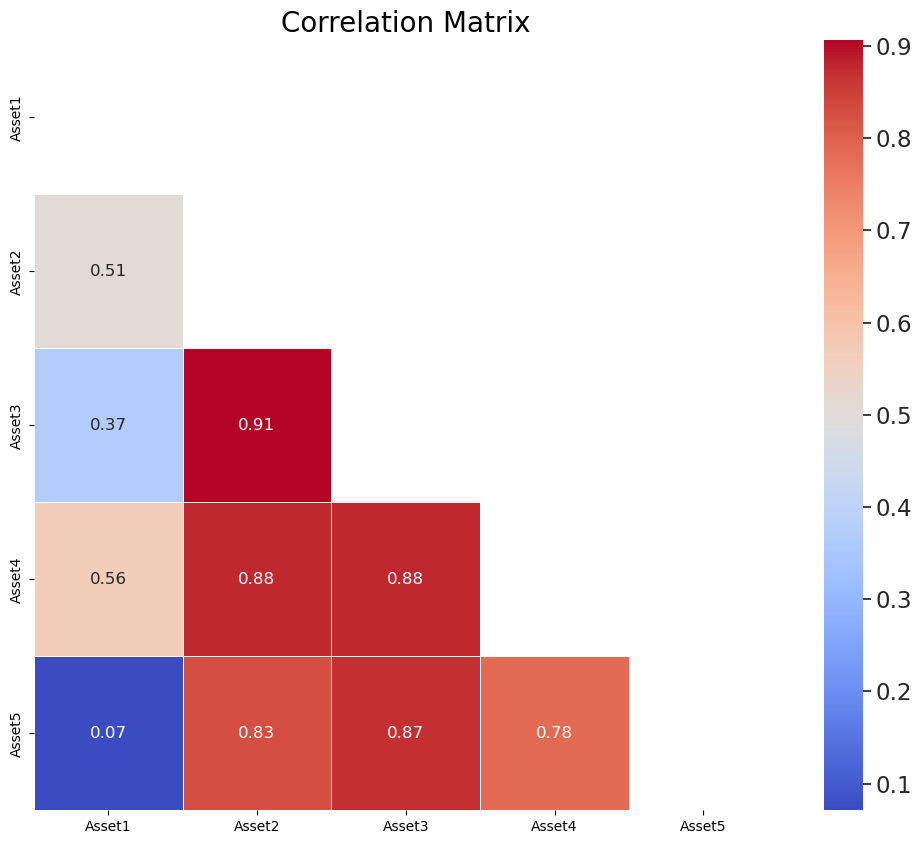

In [167]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(cor_mat)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(cor_mat, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) # add title
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

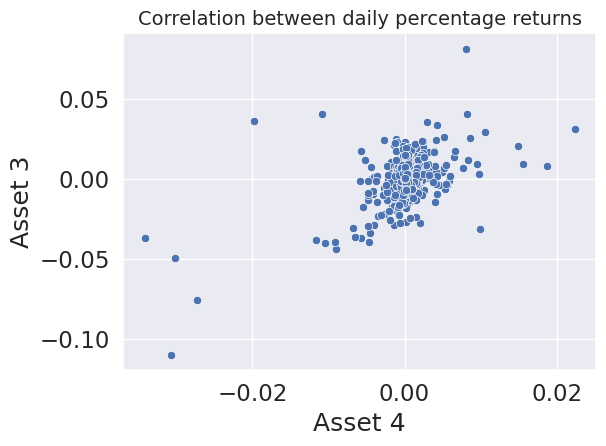

In [168]:
# scatter plot between asset3 and asset 4 daily returns
sns.scatterplot(data=df_asset_price, x="Asset4_dpr", y="Asset3_dpr")
plt.xlabel(r"Asset 4")
plt.ylabel(r"Asset 3")
plt.title(R"Correlation between daily percentage returns", fontsize=14)
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [169]:
df_port_weight

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


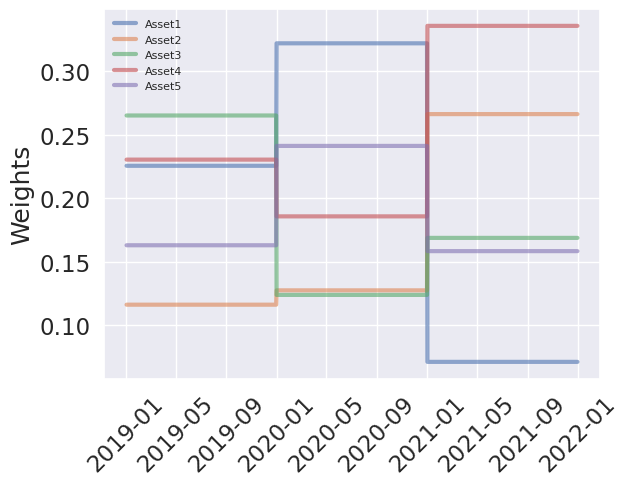

In [170]:
# area plot does not look good, so I have plotted line plot
for i in df_port_weight.columns[1:]:
    plt.plot(df_port_weight["date"], df_port_weight[i], alpha=0.6, lw=3, label=i)

plt.ylabel(r"Weights")
plt.xticks(rotation=45)
plt.legend(fontsize=8, frameon=False)
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [171]:
weights = df_port_weight.iloc[:, 1:]

In [172]:
returns

,Asset1_dpr,Asset2_dpr,Asset3_dpr,Asset4_dpr,Asset5_dpr
0,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
1,-0.002740,0.020954,0.025255,-0.001125,0.019242
2,-0.001512,0.012632,-0.007338,0.001856,0.014792
3,-0.001535,0.001003,0.007040,0.003605,-0.000192
4,0.001976,0.012919,0.002272,0.004120,0.014003
...,...,...,...,...,...
777,-0.000913,0.007384,0.005439,0.000000,0.013443
778,0.000064,0.005483,0.007599,0.000000,-0.001141
779,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
780,-0.000696,0.002903,0.003346,0.000263,0.001432


In [173]:
weights.head(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
0,0.225458,0.116255,0.265003,0.23031,0.162974
1,0.225458,0.116255,0.265003,0.23031,0.162974


In [174]:
new_weights = weights.iloc[:-1,:]

In [175]:
new_weights

,Asset1,Asset2,Asset3,Asset4,Asset5
0,0.225458,0.116255,0.265003,0.23031,0.162974
1,0.225458,0.116255,0.265003,0.23031,0.162974
2,0.225458,0.116255,0.265003,0.23031,0.162974
3,0.225458,0.116255,0.265003,0.23031,0.162974
4,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
777,0.071307,0.266093,0.168775,0.33547,0.158356
778,0.071307,0.266093,0.168775,0.33547,0.158356
779,0.071307,0.266093,0.168775,0.33547,0.158356
780,0.071307,0.266093,0.168775,0.33547,0.158356


In [176]:
returns

,Asset1_dpr,Asset2_dpr,Asset3_dpr,Asset4_dpr,Asset5_dpr
0,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
1,-0.002740,0.020954,0.025255,-0.001125,0.019242
2,-0.001512,0.012632,-0.007338,0.001856,0.014792
3,-0.001535,0.001003,0.007040,0.003605,-0.000192
4,0.001976,0.012919,0.002272,0.004120,0.014003
...,...,...,...,...,...
777,-0.000913,0.007384,0.005439,0.000000,0.013443
778,0.000064,0.005483,0.007599,0.000000,-0.001141
779,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
780,-0.000696,0.002903,0.003346,0.000263,0.001432


In [177]:
(new_weights["Asset1"] * returns["Asset1_dpr"])

0     -0.000458
1     -0.000618
2     -0.000341
3     -0.000346
4      0.000445
         ...   
777   -0.000065
778    0.000005
779   -0.000347
780   -0.000050
781    0.000059
Length: 782, dtype: float64

In [178]:
return_daily = pd.DataFrame(returns.values * new_weights.values, columns=new_weights.columns, index=returns.index).sum(axis=1)

In [179]:
return_daily

0     -0.005997
1      0.011388
2      0.002021
3      0.002435
4      0.005780
         ...   
777    0.004947
778    0.002565
779   -0.002330
780    0.001603
781   -0.001231
Length: 782, dtype: float64

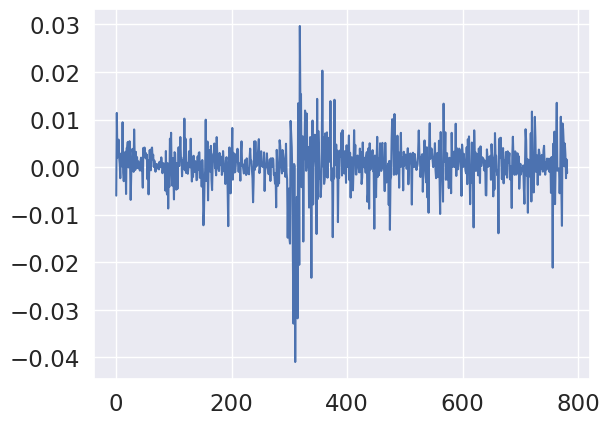

In [180]:
# plot it
plt.plot(return_daily.index, return_daily)
plt.show()

In [181]:
cumulative_returns = (1 + return_daily).cumprod()

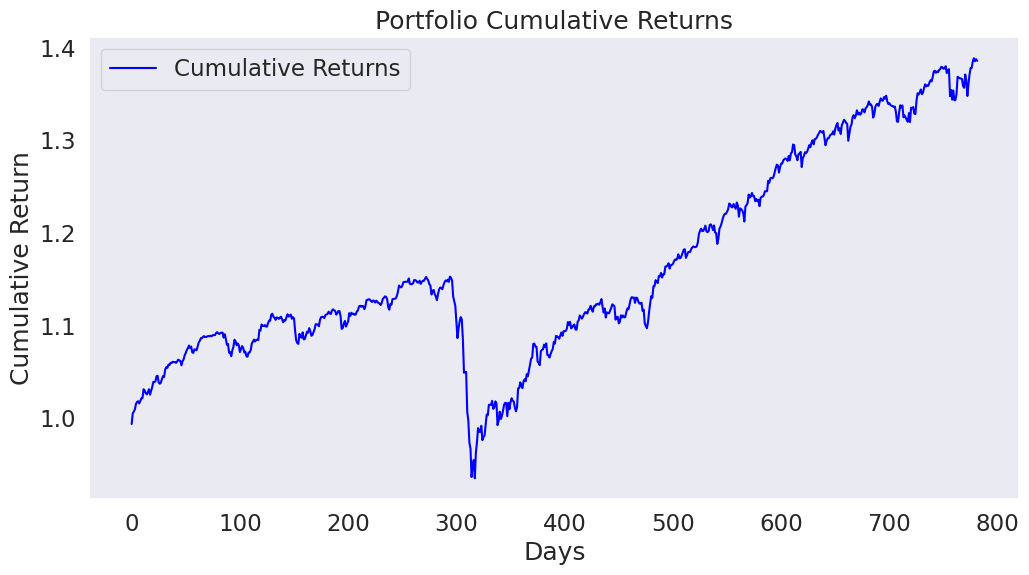

In [182]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label="Cumulative Returns", color="blue")
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [183]:
T = len(retruns)
T

783

In [187]:
annualized_return = (cumulative_returns.iloc[-1])**(261/T) - 1

In [192]:
print(f"The annualized return is: {round(annualized_return * 100, 2)}%")

The annualized return is: 11.49%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [196]:
annualized_volatility = return_daily.std() * np.sqrt(261)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")

Annualized Volatility: 8.51%


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [197]:
asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [198]:
port_weight

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [204]:
asset_categories = asset_info.set_index("Name")["Family"]

In [205]:
asset_categories

Name
Asset1    Fixed Income
Asset2    Fixed Income
Asset3          Equity
Asset4          Equity
Asset5     Alternative
Name: Family, dtype: object

In [211]:
grouped_weights = port_weight.T.join(asset_categories).groupby("Family").sum().T

<Figure size 800x400 with 0 Axes>

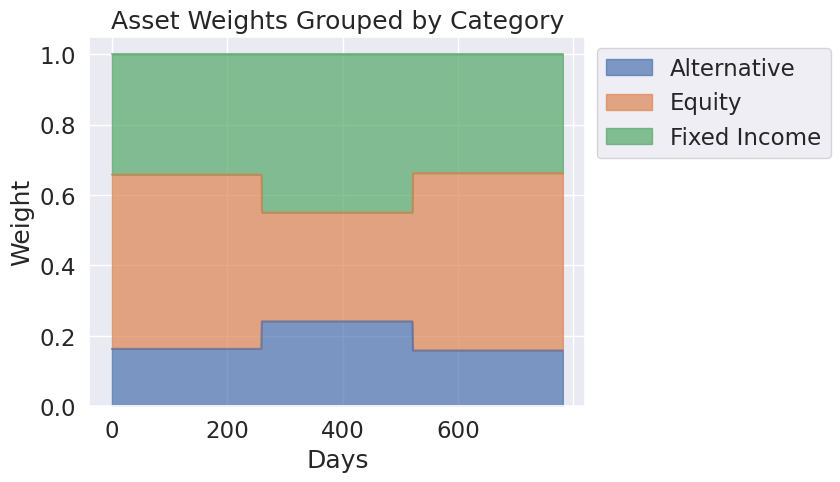

In [215]:
plt.figure(figsize=(8,4))
grouped_weights.plot.area(alpha=0.7)
plt.title("Asset Weights Grouped by Category")
plt.xlabel("Days")
plt.ylabel("Weight")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()